## Calibration of lab probes ANK1 ANK2

Probes ANK1 and ANK2 will be fixed under the canyons to measure conductivity at the heads of the canyons replacing B and C. These are made from ANKER micro usb cables.

Probe P will be used in the profiler.

We used a maximum salinity of (200 g salt/ 4 l water) which is a density of 1.03263 g/cm^3. 


Channel order: CH1 - ANK1, CH2 - ANK2, CH3 - probe 38

Ashu ran this calibration

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
df = pd.read_csv('../probesANK/calibration.csv',header=2)
print(df)


    salty  tap  percentage  density  temperature  Unnamed: 5
0     200    0         100  1.03263       20.030         NaN
1     180   20          90  1.02956       20.045         NaN
2     160   40          80  1.02598       20.014         NaN
3     140   60          70  1.02224       20.013         NaN
4     120   80          60  1.01889       20.025         NaN
5     100  100          50  1.01522       20.034         NaN
6      80  120          40  1.01181       20.020         NaN
7      60  140          30  1.00858       20.023         NaN
8      40  160          20  1.00161       20.006         NaN
9      20  180          10  0.99768       20.011         NaN
10      0  200           0  0.98296       20.035         NaN


../probesANK/100pcnt.mat
../probesANK/090pcnt.mat
../probesANK/080pcnt.mat
../probesANK/070pcnt.mat
../probesANK/060pcnt.mat
../probesANK/050pcnt.mat
../probesANK/040pcnt.mat
../probesANK/030pcnt.mat
../probesANK/020pcnt.mat
../probesANK/010pcnt.mat
../probesANK/000pcnt.mat


Text(0.5,1,'CH3 - probe 38 ')

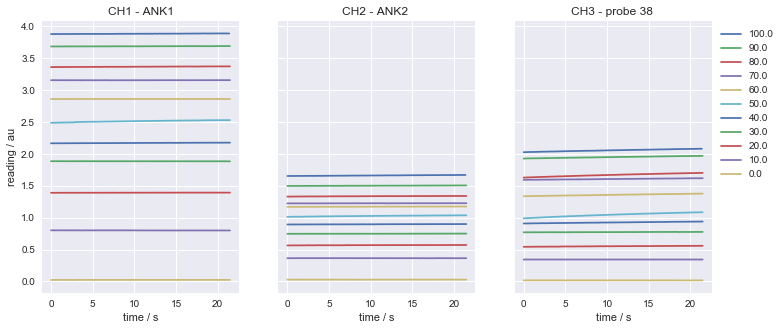

In [4]:
file_num = 11

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

mean_read_ch3 = np.zeros(file_num)
std_read_ch3 = np.zeros(file_num)

nums = ['100','090','080','070','060','050','040','030','020','010','000']
 
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../probesANK/%spcnt.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    ch3 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    mean_read_ch3[ii] = np.mean(ch3)
    std_read_ch3[ii] = np.std(ch3)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2)
    ax2.plot(time,ch3, label='%1.1f' %df.percentage[ii])
    
ax2.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax2.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')
ax2.set_title('CH3 - probe 38 ')

ANK1
rho_1 = 0.982926+0.019265r+-0.004250r^2+0.000670r^3 

ANK2
rho_2 = 0.982289+0.041039r+-0.010799r^2+0.002785r^3 

Probe 38
rho_38 = 0.982287+0.048979r+-0.023688r^2+0.005702r^3


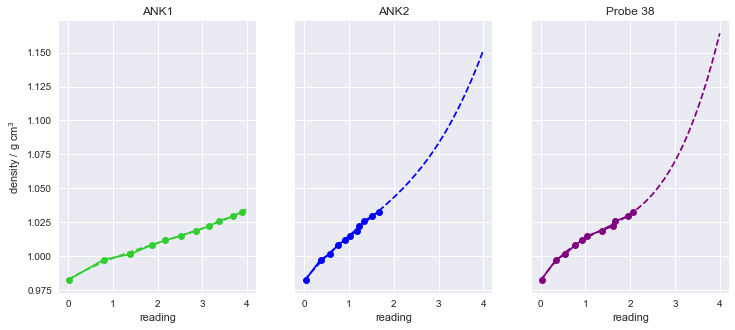

In [10]:
coef1, stats1 = P.polyfit(mean_read_ch1[:],np.array(df.density)[:],3,full=True)
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)
coef38, stats38 = P.polyfit(mean_read_ch3[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,4,30)

fit1 = coef1[0]+(coef1[1]*read_dummy)+(coef1[2]*read_dummy**2) + (coef1[3]*read_dummy**3)
fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)
fit38 = coef38[0]+(coef38[1]*read_dummy)+(coef38[2]*read_dummy**2) + (coef38[3]*read_dummy**3)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit1, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')

ax2.errorbar(mean_read_ch3,df.density, xerr=std_read_ch3, marker='o', color='purple')
ax2.plot(read_dummy, fit38,'--', color='purple')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax2.set_xlabel('reading')
ax0.set_title('ANK1')
ax1.set_title('ANK2')
ax2.set_title('Probe 38')


print('ANK1')
print('rho_1 = %f+%fr+%fr^2+%fr^3 \n' %(coef1[0], coef1[1], coef1[2], coef1[3]))

print('ANK2')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))

print('Probe 38')
print('rho_38 = %f+%fr+%fr^2+%fr^3' %(coef38[0], coef38[1], coef38[2], coef38[3]))